**Business Objective:**

To develop a predictive model that classifies individuals as Introverts or Extroverts based on their social behavior and activity patterns, helping businesses tailor products, services, or marketing strategies to better suit personality-driven preferences.


| Column Name                  | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `Time_spent_Alone`          | Number of hours a person spends alone on average daily.                    |
| `Stage_fear`                | Indicates whether the person has fear of public speaking (Yes/No).         |
| `Social_event_attendance`   | Number of social events attended in a month.                               |
| `Going_outside`             | Indicates if the person willingly goes outside regularly (Yes/No).         |
| `Drained_after_socializing`| Indicates if the person feels mentally drained after social interactions.  |
| `Friends_circle_size`       | Number of close or frequent friends in the person’s circle.                |
| `Post_frequency`            | Number of posts shared on social media per week.                          |
| `Personality`               | Target variable; indicates if the person is an Introvert or Extrovert.     |


In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/personality_dataset.csv")
df.shape

(5000, 8)

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [ ]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
4995,5,No,6,5,No,14,8,Extrovert
4996,7,No,2,3,Yes,2,5,Introvert
4997,2,No,7,3,No,11,3,Extrovert
4998,2,Yes,9,3,No,15,7,Extrovert
4999,4,Yes,6,7,No,12,3,Extrovert


In [ ]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [ ]:
# checking for dupicates and null values
print("Before Removing Duplicates: ",df.duplicated().sum()," : ", df.shape)
df.drop_duplicates(inplace=True)
print("After Removing Duplicates: ",df.duplicated().sum(), " : ",df.shape)

Before Removing Duplicates:  128  :  (5000, 8)
After Removing Duplicates:  0  :  (4872, 8)


In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,4872.0,4.976190,3.038156,0.0,3.0,5.0,7.0,11.0
Social_event_attendance,4872.0,4.993842,2.855725,0.0,3.0,5.0,7.0,10.0
Going_outside,4872.0,3.517857,2.089579,0.0,2.0,4.0,5.0,7.0
Friends_circle_size,4872.0,7.254310,4.058642,0.0,5.0,7.0,10.0,15.0
Post_frequency,4872.0,4.758621,2.783804,0.0,3.0,5.0,7.0,10.0


**Basic DataSet Summary:**

* Total number of data points are: (Rows = 5000, columns = 8)
* These are the columns we will be working with: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality']
* We have a total of 5 numerical columns and 3 categorical columns.
* There were quite a few number of duplicated rows, we handled them.
* Fortunately we don't have any null values in any columns.

In [ ]:
# Let's separate categorical and numerical columns
col = df.dtypes == object
obj_cols = (col[col] == True).index

col = df.dtypes != object
num_cols = (col[col] == True).index

print("Categorical Columns are: ", obj_cols)
print("Numerical Columns are: ", num_cols)

Categorical Columns are:  Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')
Numerical Columns are:  Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


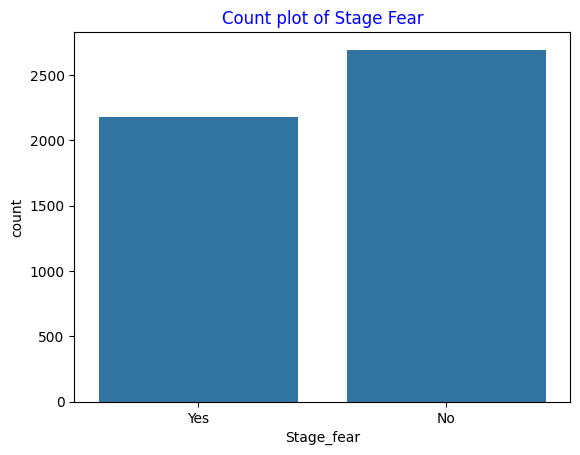

In [ ]:
# Count plot of categorical columns
sns.countplot(x=df['Stage_fear'])
plt.title("Count plot of Stage Fear", color="blue")
plt.show()

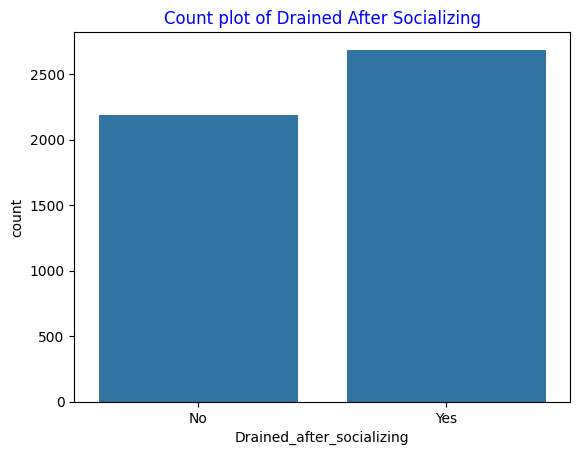

In [ ]:
# Count plot of categorical columns
sns.countplot(x=df['Drained_after_socializing'])
plt.title("Count plot of Drained After Socializing", color="blue")
plt.show()

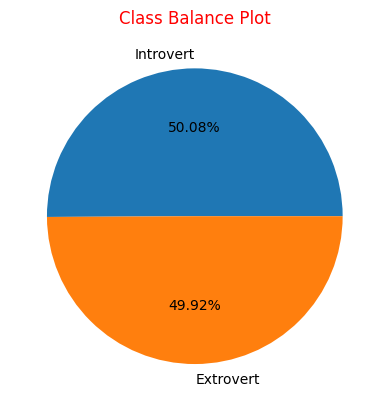

In [ ]:
# Checking for imbalance class
plt.pie(df['Personality'].value_counts(), autopct="%.2f%%", labels=df['Personality'].value_counts().index)
plt.title("Class Balance Plot", color="red")
plt.show()

* Classes appears to be balanced, which is a good thiing for us since we don't need to resample the data or use StratifiedShuffle.

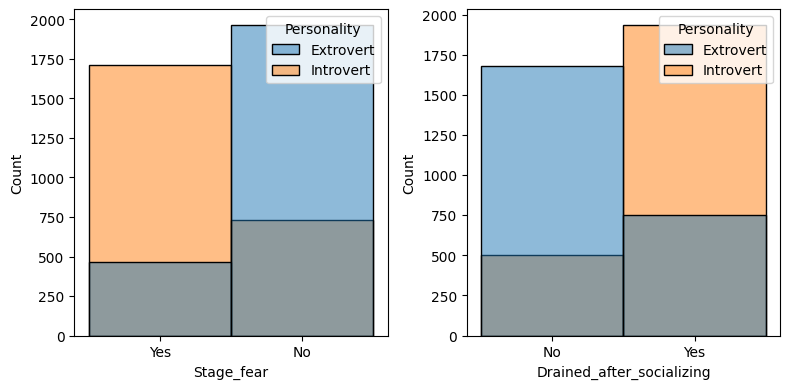

In [ ]:
plt.figure(figsize=(8, 4))
index=0
for col in obj_cols[:2]:
    index += 1
    plt.subplot(1, 2, index)
    sns.histplot(x=col, hue="Personality", data=df, alpha=0.5)
plt.tight_layout()
plt.show()

* Fairly strong numbers here could be a reason for person being introvert or extrovert.
* Mostly extroverts tends to have lesser stage_fear which makes sense since they are fairly confident while socializing on the other hand most introverts are not.
* Most extroverts appear to be drained after socializing which does make sense if you approach this with a different perspective. The perspective being you involve yourself so much in that process that you drain all of your energy for the sake o it on the other hand if you are an introvert you wouldn't wanna spend a lot of energy to see your point across.

In [ ]:
# Let's fix these coulumns and make them machine feedable
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(df[['Drained_after_socializing', 'Stage_fear']])
encoded_features_names = encoder.get_feature_names_out()
df[encoded_features_names] = encoded_cols
df.drop(columns=['Drained_after_socializing', 'Stage_fear'], axis=1, inplace=True)
df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Drained_after_socializing_No,Drained_after_socializing_Yes,Stage_fear_No,Stage_fear_Yes
0,3,6,7,14,5,Extrovert,1.0,0.0,0.0,1.0
1,2,8,6,7,8,Extrovert,1.0,0.0,1.0,0.0
2,1,9,4,9,3,Extrovert,1.0,0.0,1.0,0.0
3,8,0,0,9,3,Introvert,0.0,1.0,1.0,0.0
4,5,3,0,2,6,Introvert,1.0,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4872 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               4872 non-null   int64  
 1   Social_event_attendance        4872 non-null   int64  
 2   Going_outside                  4872 non-null   int64  
 3   Friends_circle_size            4872 non-null   int64  
 4   Post_frequency                 4872 non-null   int64  
 5   Personality                    4872 non-null   object 
 6   Drained_after_socializing_No   4872 non-null   float64
 7   Drained_after_socializing_Yes  4872 non-null   float64
 8   Stage_fear_No                  4872 non-null   float64
 9   Stage_fear_Yes                 4872 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 418.7+ KB


* Everything looks good now we need to work on the target column and convert it into numerical column.

In [ ]:
# Converting target column from objective type to numeric type
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Personality'] = le.fit_transform(df['Personality'])

In [ ]:
print(df.Personality.sample(5))
print("Calsses: ",le.classes_)

1081    0
2641    1
4987    1
3995    1
3445    1
Name: Personality, dtype: int64
Calsses:  ['Extrovert' 'Introvert']


* Here we can see a sample of target column after transforming it and their relative classes.
* It goes like Extrovert -> 0 and Introvert -> 1
* Now our data is ready for model building.

In [ ]:
# Feature Selectiong
X =  df.drop("Personality", axis=1)
Y = df['Personality']
X.shape, Y.shape

((4872, 9), (4872,))

In [ ]:
# Splitting the data for training and testing
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape


Now we have successfully splitted the data for training and testing purpose along with proper features and target column.

In [ ]:
# (Optional): Imagine yourself in a position not able to utilize sklearn for some reason, how will you split the data for training and testing?
split = int((len(df)*.8))

train_data = df.sample(split, random_state=45)
test_data = df.drop(train_data.index)
train_data.shape, test_data.shape

((3897, 10), (975, 10))

In [ ]:
# Getting training and testing validation data
y_train = train_data.pop("Personality")
y_test = test_data.pop("Personality")

y_train.shape, y_test.shape

((3897,), (975,))

In [ ]:
# Getting training and testing data of feature part
x_train, x_test = train_data, test_data
x_train.shape, x_test.shape

((3897, 9), (975, 9))

In [ ]:
x_train.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Drained_after_socializing_No,Drained_after_socializing_Yes,Stage_fear_No,Stage_fear_Yes
534,5,0,2,9,1,0.0,1.0,0.0,1.0
3685,6,5,2,3,0,0.0,1.0,0.0,1.0
1399,5,3,4,9,4,0.0,1.0,0.0,1.0
1390,7,0,0,6,5,0.0,1.0,0.0,1.0
990,4,4,4,9,2,0.0,1.0,1.0,0.0


In [ ]:
y_train.head()

,Personality
534,1
3685,1
1399,1
1390,1
990,1


* Here we can confirm that our index matches and we finally performed splitting the data without using sklearn.

In [ ]:
# Let's scale the data for using linear models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

# Model Building

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)

# Global dictionary to store results
model_results = {}

def eval_metrics(model, x_test, y_test):
    # Generate predictions
    y_pred = model.predict(x_test)

    # --- Print classification report ---
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))

    # --- Confusion matrix ---
    print("\n🔢 Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    # --- Compute metrics ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    # --- Build a unique model key ---
    base_name = model.__class__.__name__
    i = 1
    key = base_name
    while key in model_results:
        i += 1
        key = f"{base_name}_{i}"

    # --- Store metrics in the dictionary ---
    model_results[key] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec
    }

    print(f"\n✅ Stored results under key: '{key}'")



### 1. Linear Models : Logistic Regression and Logistic Regression CV


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'LogisticRegression'


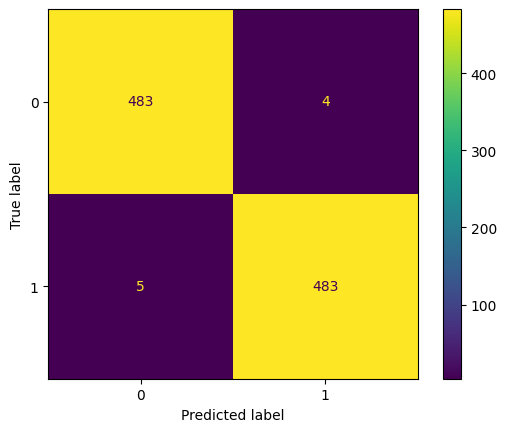

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression(C=10, penalty="l2")
lr.fit(x_train_s, y_train)
eval_metrics(lr, x_test_s, y_test)

* Very Solid Result, with this model we are able to classify introverts and extroverts quite easily.
* With this we can say our model has a pretty good understanding of classifying Introverts and Extroverts.

In [ ]:
print("Logistic Regression Stats: ",model_results['LogisticRegression'])

Logistic Regression Stats:  {'accuracy': 0.9907692307692307, 'precision': 0.9917864476386037, 'recall': 0.9897540983606558}



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'LogisticRegressionCV'


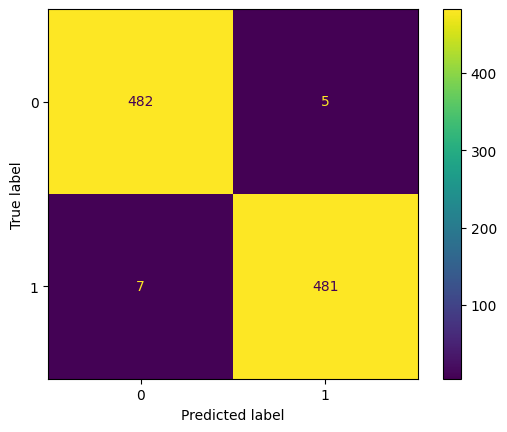

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(Cs=10, penalty="l2", cv=4, solver='lbfgs',)
lrcv.fit(x_train_s, y_train)
eval_metrics(lrcv, x_test_s, y_test)

In [ ]:
print("Logistic Regression CV Stats: ",model_results['LogisticRegressionCV'])

Logistic Regression CV Stats:  {'accuracy': 0.9876923076923076, 'precision': 0.9897119341563786, 'recall': 0.985655737704918}



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'SGDClassifier'


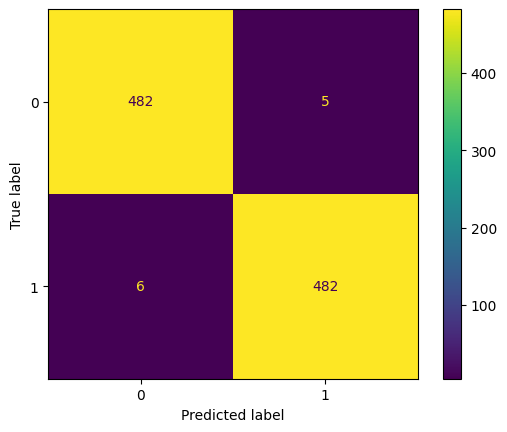

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train_s, y_train)
eval_metrics(sgd, x_test_s, y_test)

In [ ]:
print("SGD Classifier Stats: ", model_results['SGDClassifier'])

SGD Classifier Stats:  {'accuracy': 0.9887179487179487, 'precision': 0.9897330595482546, 'recall': 0.9877049180327869}


### 2. Implementing Linear_SVM and SVC(kernel='poly')


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'LinearSVC'


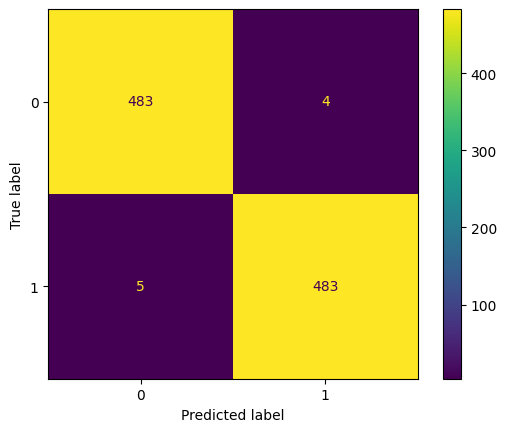

In [ ]:
from sklearn.svm import LinearSVC

svc_lr = LinearSVC(penalty='l2', max_iter=1000)
svc_lr.fit(x_train_s, y_train)
eval_metrics(svc_lr, x_test_s, y_test)

In [ ]:
print("Linear SVC Stats: ",model_results['LinearSVC'])

Linear SVC Stats:  {'accuracy': 0.9907692307692307, 'precision': 0.9917864476386037, 'recall': 0.9897540983606558}



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'SVC'


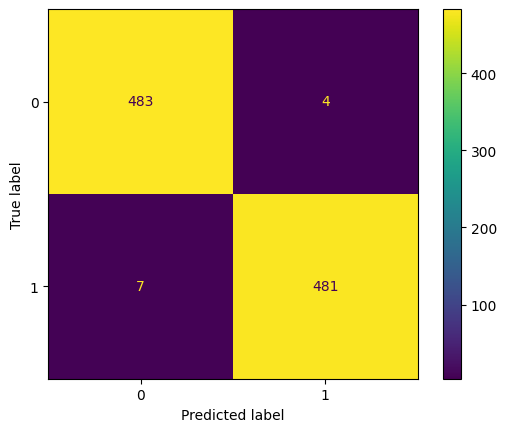

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')
svc.fit(x_train_s, y_train)
eval_metrics(svc, x_test_s, y_test)

* We can observe the same results pretty much but obviously LinearSVC performed better than SVC with poly as it's kernel.

In [ ]:
print("SVC Stats: ",model_results['SVC'])

SVC Stats:  {'accuracy': 0.9887179487179487, 'precision': 0.9917525773195877, 'recall': 0.985655737704918}


### Naive Bayes

🔎
GaussianNB
MultinomialNB
BernoulliNB
ComplementNB
CategoricalNB


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       487
           1       0.98      0.98      0.98       488

    accuracy                           0.98       975
   macro avg       0.98      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975


🔢 Confusion Matrix:

✅ Stored results under key: 'GaussianNB'


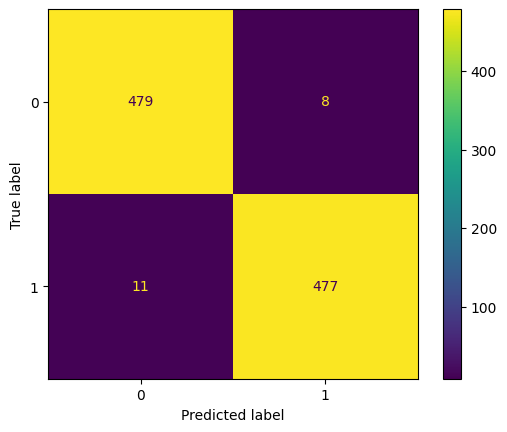

In [ ]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()
gb.fit(x_train, y_train)
eval_metrics(gb, x_test, y_test)

In [ ]:
print("Gaussian Naieve Bayes Stats: ",model_results['GaussianNB'])

Gaussian Naieve Bayes Stats:  {'accuracy': 0.9805128205128205, 'precision': 0.9835051546391752, 'recall': 0.9774590163934426}


### 3. K-Nearest-Neighbors Classifier


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'KNeighborsClassifier'


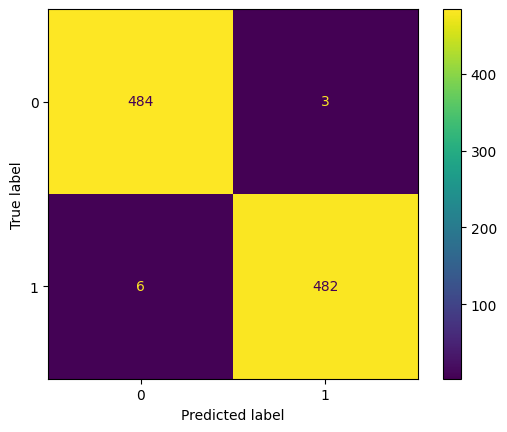

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', metric='minkowski')
knn.fit(x_train_s, y_train)
eval_metrics(knn, x_test_s, y_test)

* This model is also performing fairly good comapred to other models.

In [ ]:
print("K Nearest Neighbors Stats: ",model_results['KNeighborsClassifier'])

K Nearest Neighbors Stats:  {'accuracy': 0.9907692307692307, 'precision': 0.9938144329896907, 'recall': 0.9877049180327869}


### 4. DecisionTreeClassifier


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       487
           1       0.99      1.00      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'DecisionTreeClassifier'


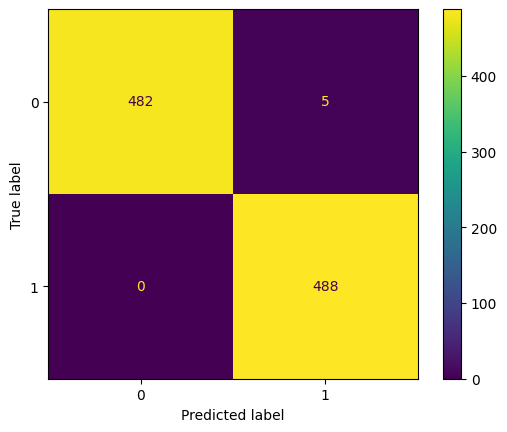

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)                  # here we are training with unscaled data because tree based models are not affected by scales
eval_metrics(dtc, x_test, y_test)

In [ ]:
print("Decision Tree Stats: ",model_results['DecisionTreeClassifier'])

Decision Tree Stats:  {'accuracy': 0.9948717948717949, 'precision': 0.9898580121703854, 'recall': 1.0}


* Decision Tree is performing better than all other models.

### 5. Random Forest Classifier


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       487
           1       0.98      1.00      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'RandomForestClassifier'


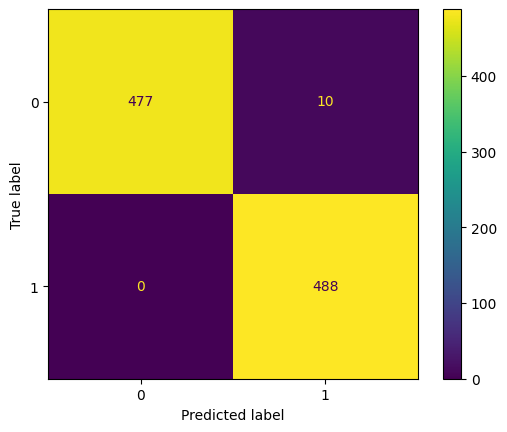

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, max_depth=3)
rfc.fit(x_train, y_train)
eval_metrics(rfc, x_test, y_test)

In [ ]:
print("Random Forest Classifier Stats: ",model_results['RandomForestClassifier'])

Random Forest Classifier Stats:  {'accuracy': 0.9897435897435898, 'precision': 0.9799196787148594, 'recall': 1.0}


### Extra Trees Classifier


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'ExtraTreesClassifier'


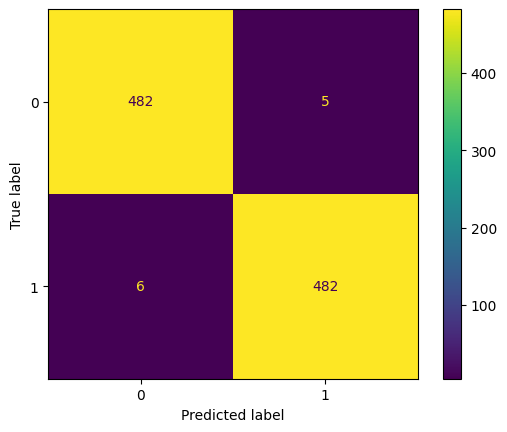

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, max_depth=5)
etc.fit(x_train, y_train)
eval_metrics(etc, x_test, y_test)

In [ ]:
print("Extra Trees Classifier Stats: ",model_results['ExtraTreesClassifier'])

Extra Trees Classifier Stats:  {'accuracy': 0.9887179487179487, 'precision': 0.9897330595482546, 'recall': 0.9877049180327869}


### Gradient Boosting Classifier



📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       487
           1       0.99      1.00      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'GradientBoostingClassifier'


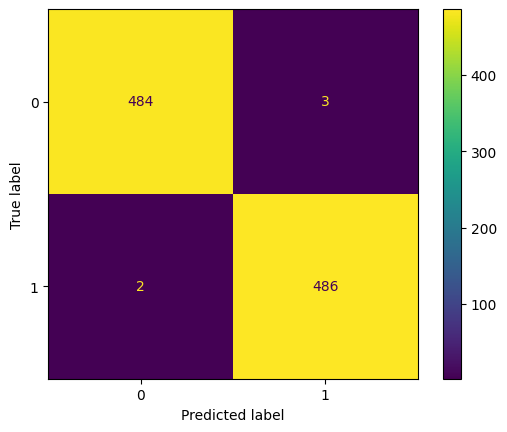

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss="log_loss")
gbc.fit(x_train, y_train)
eval_metrics(gbc, x_test, y_test)

In [ ]:
print("Gradient Boosting Classifier Stats: ",model_results['GradientBoostingClassifier'])

Gradient Boosting Classifier Stats:  {'accuracy': 0.9948717948717949, 'precision': 0.9938650306748467, 'recall': 0.9959016393442623}


### Hist Gradient Boosting Classifier


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       487
           1       0.99      1.00      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'HistGradientBoostingClassifier'


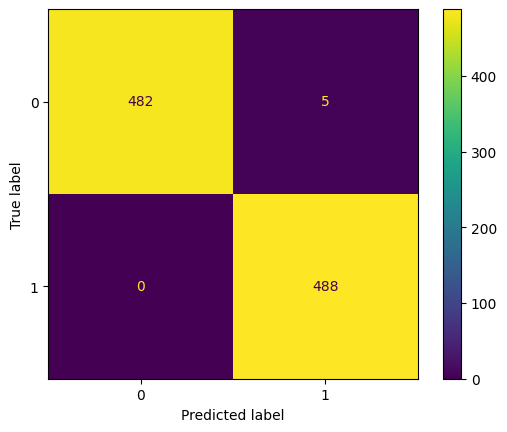

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(loss='log_loss', learning_rate=0.01, max_iter = 200, max_depth=5)
hgbc.fit(x_train, y_train)
eval_metrics(hgbc, x_test, y_test)

In [ ]:
print("Hist Gradient Boosting Classifier Stats: ",model_results['HistGradientBoostingClassifier'])

Hist Gradient Boosting Classifier Stats:  {'accuracy': 0.9948717948717949, 'precision': 0.9898580121703854, 'recall': 1.0}



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'BaggingClassifier'


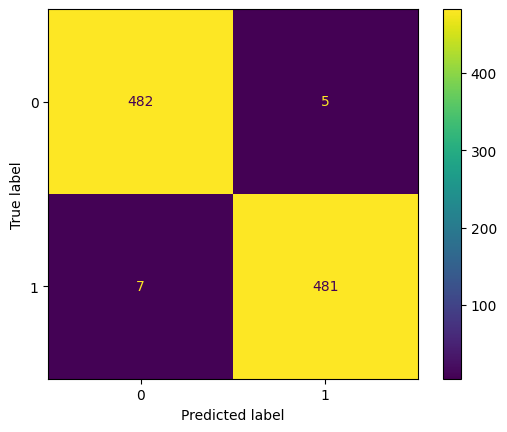

In [ ]:
from sklearn.ensemble import BaggingClassifier

model = LogisticRegressionCV()
bgc = BaggingClassifier(estimator=model, n_estimators=20)
bgc.fit(x_train_s, y_train)
eval_metrics(bgc, x_test_s, y_test)


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       487
           1       0.99      1.00      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'BaggingClassifier_2'


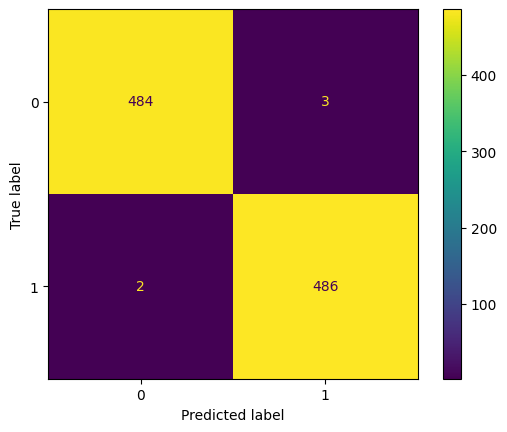

In [ ]:
from sklearn.ensemble import BaggingClassifier

model = DecisionTreeClassifier()
bgc = BaggingClassifier(estimator=model, n_estimators=20)
bgc.fit(x_train, y_train)
eval_metrics(bgc, x_test, y_test)


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.99      0.99      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'BaggingClassifier_3'


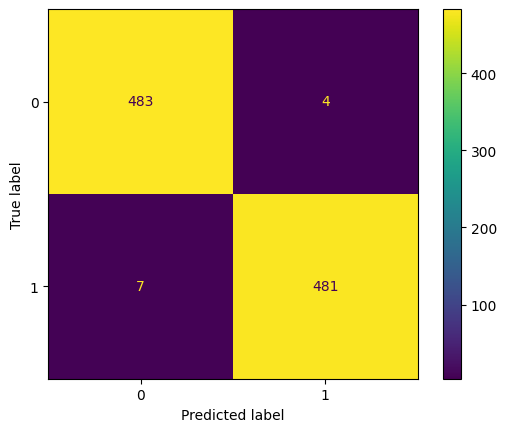

In [ ]:
from sklearn.ensemble import BaggingClassifier

model = SVC()
bgc = BaggingClassifier(estimator=model, n_estimators=20)
bgc.fit(x_train_s, y_train)
eval_metrics(bgc, x_test_s, y_test)


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       487
           1       0.99      1.00      0.99       488

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


🔢 Confusion Matrix:

✅ Stored results under key: 'AdaBoostClassifier'


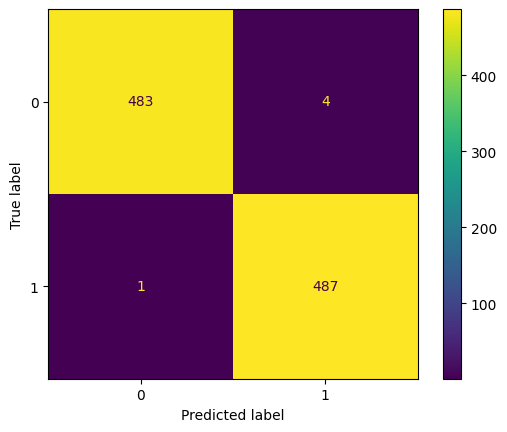

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
eval_metrics(abc, x_test, y_test)

In [ ]:
print("Ada Boost Classifier Stats: ",model_results['AdaBoostClassifier'])

Ada Boost Classifier Stats:  {'accuracy': 0.9948717948717949, 'precision': 0.9918533604887984, 'recall': 0.9979508196721312}


In [ ]:
metric_df = pd.DataFrame(model_results).T
metric_df

,accuracy,precision,recall
LogisticRegression,0.990769,0.991786,0.989754
LogisticRegressionCV,0.987692,0.989712,0.985656
SGDClassifier,0.988718,0.989733,0.987705
LinearSVC,0.990769,0.991786,0.989754
SVC,0.988718,0.991753,0.985656
GaussianNB,0.980513,0.983505,0.977459
KNeighborsClassifier,0.990769,0.993814,0.987705
DecisionTreeClassifier,0.994872,0.989858,1.000000
RandomForestClassifier,0.989744,0.979920,1.000000
ExtraTreesClassifier,0.988718,0.989733,0.987705


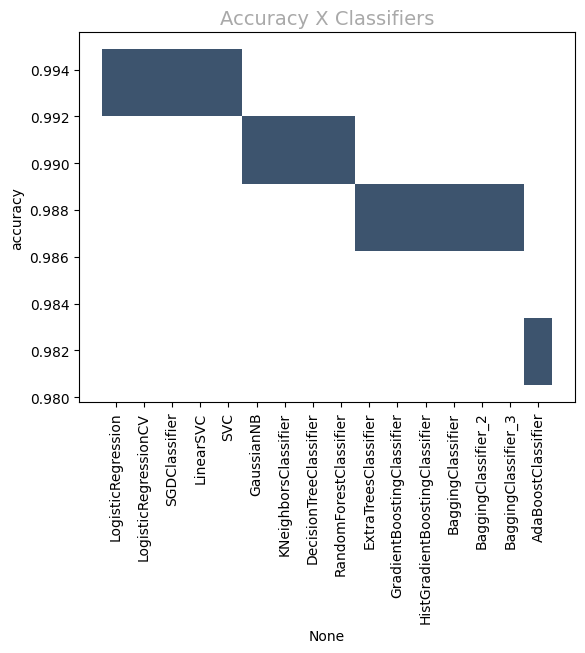

In [ ]:
# Histplot based on Accuracy and Classifiers
sns.histplot(x=metric_df.index, y=metric_df.accuracy.sort_values(ascending=False))
plt.title("Accuracy X Classifiers", size=14, color='darkgrey')
plt.xticks(rotation=90)
plt.show()

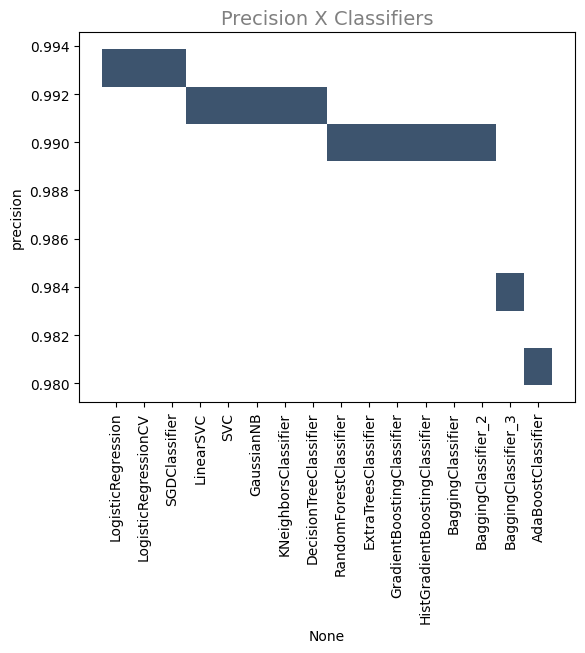

In [ ]:
# Histplot based on Precision and Classifiers
sns.histplot(x=metric_df.index, y=metric_df.precision.sort_values(ascending=False))
plt.title("Precision X Classifiers", size=14, color='grey')
plt.xticks(rotation=90)
plt.show()

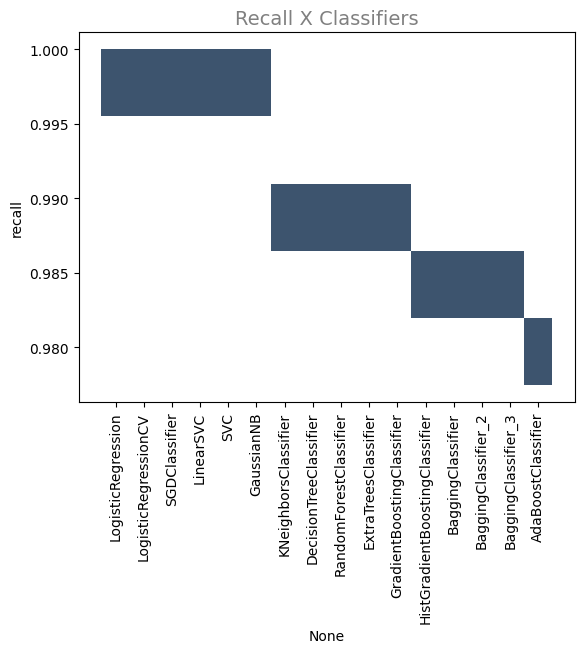

In [ ]:
# Histplot based on Recall and Classifiers
sns.histplot(x=metric_df.index, y=metric_df.recall.sort_values(ascending=False))
plt.title("Recall X Classifiers", size=14, color='grey')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Best Models Based on Accuracy are: \n", metric_df[metric_df['accuracy'] == metric_df['accuracy'].max()])

Best Models Based on Accuracy are: 
                                 accuracy  precision    recall
DecisionTreeClassifier          0.994872   0.989858  1.000000
GradientBoostingClassifier      0.994872   0.993865  0.995902
HistGradientBoostingClassifier  0.994872   0.989858  1.000000
BaggingClassifier_2             0.994872   0.993865  0.995902
AdaBoostClassifier              0.994872   0.991853  0.997951


In [ ]:
print("Best Models Based on Precision is: \n", metric_df[metric_df['precision'] == metric_df['precision'].max()])

Best Models Based on Precision is: 
                             accuracy  precision    recall
GradientBoostingClassifier  0.994872   0.993865  0.995902
BaggingClassifier_2         0.994872   0.993865  0.995902


In [ ]:
print("Best Models Based on Recall are: \n", metric_df[metric_df['recall'] == metric_df['recall'].max()])

Best Models Based on Recall are: 
                                 accuracy  precision  recall
DecisionTreeClassifier          0.994872   0.989858     1.0
RandomForestClassifier          0.989744   0.979920     1.0
HistGradientBoostingClassifier  0.994872   0.989858     1.0


**Conclusion:**

With this we come to a conclusion of this NoteBook of trying to model and understand the personality traits of people based on certain creterion in this case being Time_spent_Alone, social_event_attendance etc...

Thank you so much for going through this till the end, feel free to get in touch if you have any queries... :)